# 作業  
用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)  

載入 相關套件 並 執行 kmean 實驗 ： 
* 實驗測試不同的群數  
* 實驗測試不同的初始值  
* 呈現結果  

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
#設定模型估計參數
estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_bad_init_n3', KMeans(n_clusters=3, n_init=1,init='random')),
              ('k_means_n3_em', KMeans(n_clusters=3, n_init=10, max_iter=100, algorithm='full')) #用EM algorithm ~
             ]

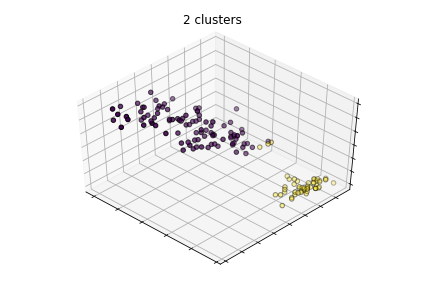

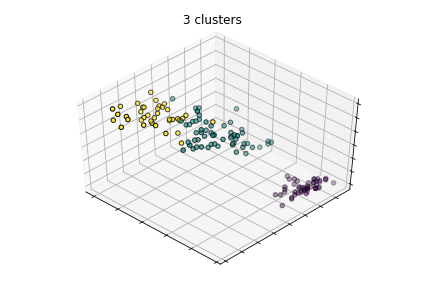

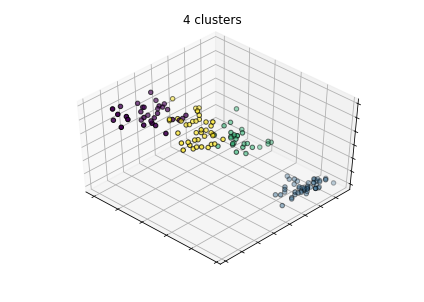

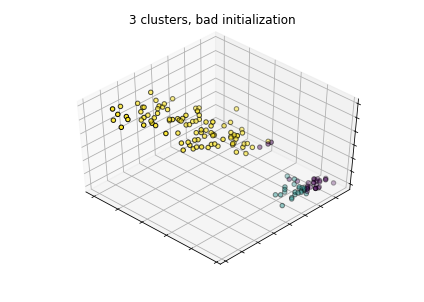

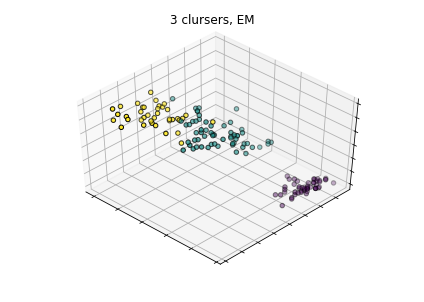

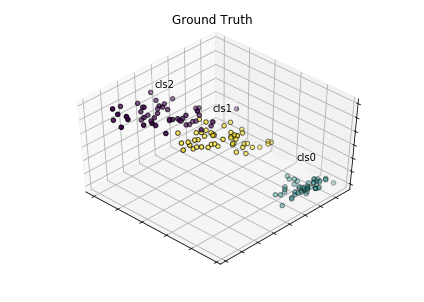

In [3]:
fignum = 1
titles = ['2 clusters', '3 clusters', '4 clusters', '3 clusters, bad initialization', '3 clursers, EM']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) 
    #rect參數:left, bottom, width, height、elev仰角視角(default30)、azim方位角視角(default-60)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12


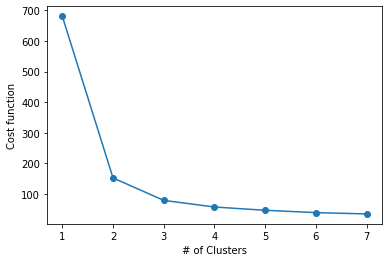

In [11]:
#計算不同分組數量的集群內誤差平方和，繪製成圖
dis = []
for i in range(1,8):
    KM = KMeans(n_clusters=i,init='random',n_init=10,max_iter=500,random_state=0)
    KM.fit(X)
    dis.append(KM.inertia_) #means SSE

plt.plot(range(1,8),dis,marker= 'o')
plt.xlabel('# of Clusters')
plt.ylabel('Cost function')
plt.show()


當拿到資料，尚不知道要分成幾群時有一些常見法則：  
令k為理想分群數，K為真實分群數  
* Rule of thumb: k=sqrt(n/2), n為樣本數  
* Elbow Method: 畫出每個k值的SSE。當選擇的k值小於K時，k每增加1，cost就會大幅下降；當選擇的k值大於K時，cost下降幅度不明顯。因此，適切的k值就會在轉折處，類似elbow的地方~  

由上圖可看出，當分群數為3時是最理想狀態。


# K-means 範例


In [ ]:
#安裝套件
#!pip3 install --user sklearn
#!pip3 install --user --upgrade matplotlib

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [9]:
#載入toy example資料集
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

In [14]:
#設定模型估計參數
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

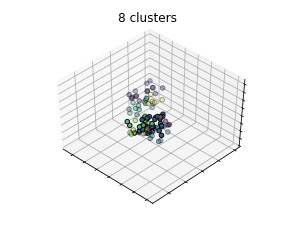

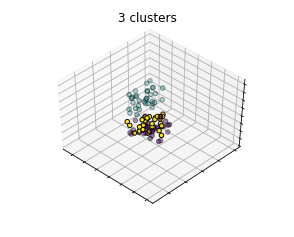

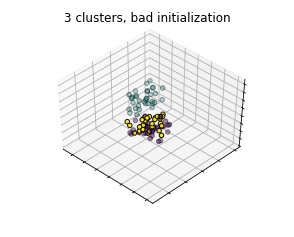

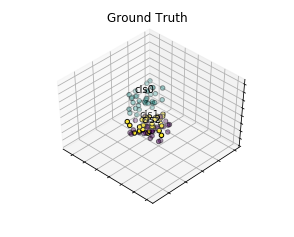

In [16]:
#資料建模並視覺化結果
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) 
    #rect參數:left, bottom, width, height、elev仰角視角(default30)、azim方位角視角(default-60)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

參考資料
1. [Clustering](https://www.youtube.com/watch?time_continue=3&v=aIybuNt9ps4)

2. [Clustering Means Algorithm](https://www.youtube.com/watch?v=hDmNF9JG3lo)

3. [Unsupervised Machine Learning:Flat Clustering](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/)
